# Ejercicio 9.4: Difusión Termica en la corteza terrestre

Un ejemplo clásico de un problema de difusión con condiciones de frontera varibles en el tiempo es la difusión del calor en la corteza de la Tierra, como la temperatura de la superficie varía con las temporadas. Suponga que la temperatura media diaria en un punto particular de la superficie varía como:

$$T_{0}(t)=A+Bsin\frac{2\pi t}{\tau }$$

donde $\tau =365dias$, $A=10^{\circ}C$ y $B=12^{\circ}C$. En la profundidad de $20m$ debajo de la superficie al menos toda la variación de temperatura anual es subsanada y la temperatura es, en una buena aproximación, un constante $11^{\circ}C$ (el cual es mayor que la temperatura media de la superficie de $10^{\circ}C$ -la temperatura aumenta con la profundidad, debido a el calentamiento del núcleo caliente del planta). La difusividad térmica de la corteza de la Tierra varía algo de lugar a lugar, pero para nuestro proposito la trataremos como una constante con el valor $D=0.1m^{2}dia^{-1}$.

Escriba un programa, o modifique uno de los dados en este capítulo, para calcular el perfil de temperatura de la corteza como una función de la profundidad a $20m$ y tiempo a $10 años$. Empiece con la temperatura en todos lados igual a $10^{\circ}C$, excepto en la superficie y el punto más profundo, escoja valores para el número de puntos de malla y el paso de tiempo, entonces corra su programa para los primeros nueve años simulados, para permitir que se establezca en cualquier patrón que alcance. Entonces para el decimo y final año imprima cuatro temperaturas tomadas un intervalo de 3 meses en una sola gráfica para ilustrar como la temperatura cambia como una función de la profundidad y el tiempo.

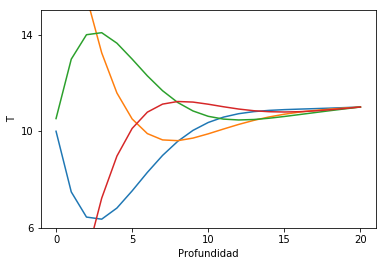

In [7]:
import numpy as np
from numpy import empty
from pylab import plot,xlabel,ylabel,show,sin
from math import pi
import matplotlib.pyplot as plt


###### Constantes ######
L = 20  #Profundidad
D = 0.1 #Difusividad Termica
N = 20  #Número de pasos
a = L/N
h = 0.01 # Dimensión temporal
epsilon = h/100 
########################


###### Solución de la ecuación ######
A = 10 # Condición inicial
B = 12 # Condición inicial
tau = 365
def T0(t):
    return A + B*sin(2*pi*t/tau)
#####################################


###### Tiempo en los cuales se evalua la solución ######
tmin = 365*9
t1 = tmin
t2 = tmin + 90
t3 = t2 + 90
t4 = t3 + 90
tend = t4 + epsilon
########################################################


###### Arreglos para las soluciones ######
T = empty(N+1,float)
T[1:N] = 10
Tp = empty(N+1,float)
##########################################


###### Ciclo Principal ######

t = 0.0 # vr inicial
c = h*D/(a*a) # término que estabiliza la solución 
############################# 


###### Ciclo que calcula los nuevos valores de T ######
while t<tend:
    T[0] = T0(t)
    T[N] = 11
    for i in range (1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T
    t += h
#######################################################

    
###### Hacer grafico en los tiempos dados ######
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)
################################################

        
###### Arreglo de la gráfca ######        
xlabel("Profundidad")
ylabel("T")
x = [0,5,10,15,20]
plt.xticks(x)
plt.ylim((6,15))
y = [6,10,14]
plt.yticks(y)
plt.show()
##################################

In [ ]:
# La gráfica anterior muestra el comportamiento que tiene la temperatura de la corteza terrestre 
# a medida que aumenta la profundidad, esta relación se da en la evolución del tiempo. Por otro la 
# representación está dada para un año en intervalor de 3 meses, cada una de la lineas representa dicho 
# comportamiento, siendo la azul la del primer trimestre, la amarilla es para el sugundo trimestre, la verde
# para el tercer trimestre y la roja representa el cuarto y último trimestre.